<a href="https://colab.research.google.com/github/andrewsundberg/DS301/blob/master/DS301_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/GrantRuedy/DS_301/master/bank_data.csv')

In [0]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


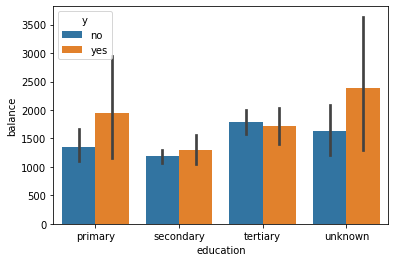

In [0]:
sns.barplot(x="education", y="balance", data=df, hue='y')

In [0]:
df_num = df.select_dtypes(include=['int64'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
age         4521 non-null int64
balance     4521 non-null int64
day         4521 non-null int64
duration    4521 non-null int64
campaign    4521 non-null int64
pdays       4521 non-null int64
previous    4521 non-null int64
dtypes: int64(7)
memory usage: 247.4 KB


In [0]:
#Looking at correlation matrix with numerical columns
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,balance,day,duration,campaign,pdays,previous
age,1,0.0838201,-0.0178526,-0.00236689,-0.0051479,-0.00889353,-0.00351092
balance,0.0838201,1,-0.00867705,-0.0159499,-0.00997617,0.00943668,0.0261964
day,-0.0178526,-0.00867705,1,-0.0246293,0.160706,-0.0943515,-0.0591144
duration,-0.00236689,-0.0159499,-0.0246293,1,-0.068382,0.0103802,0.0180803
campaign,-0.0051479,-0.00997617,0.160706,-0.068382,1,-0.0931368,-0.0678326
pdays,-0.00889353,0.00943668,-0.0943515,0.0103802,-0.0931368,1,0.577562
previous,-0.00351092,0.0261964,-0.0591144,0.0180803,-0.0678326,0.577562,1


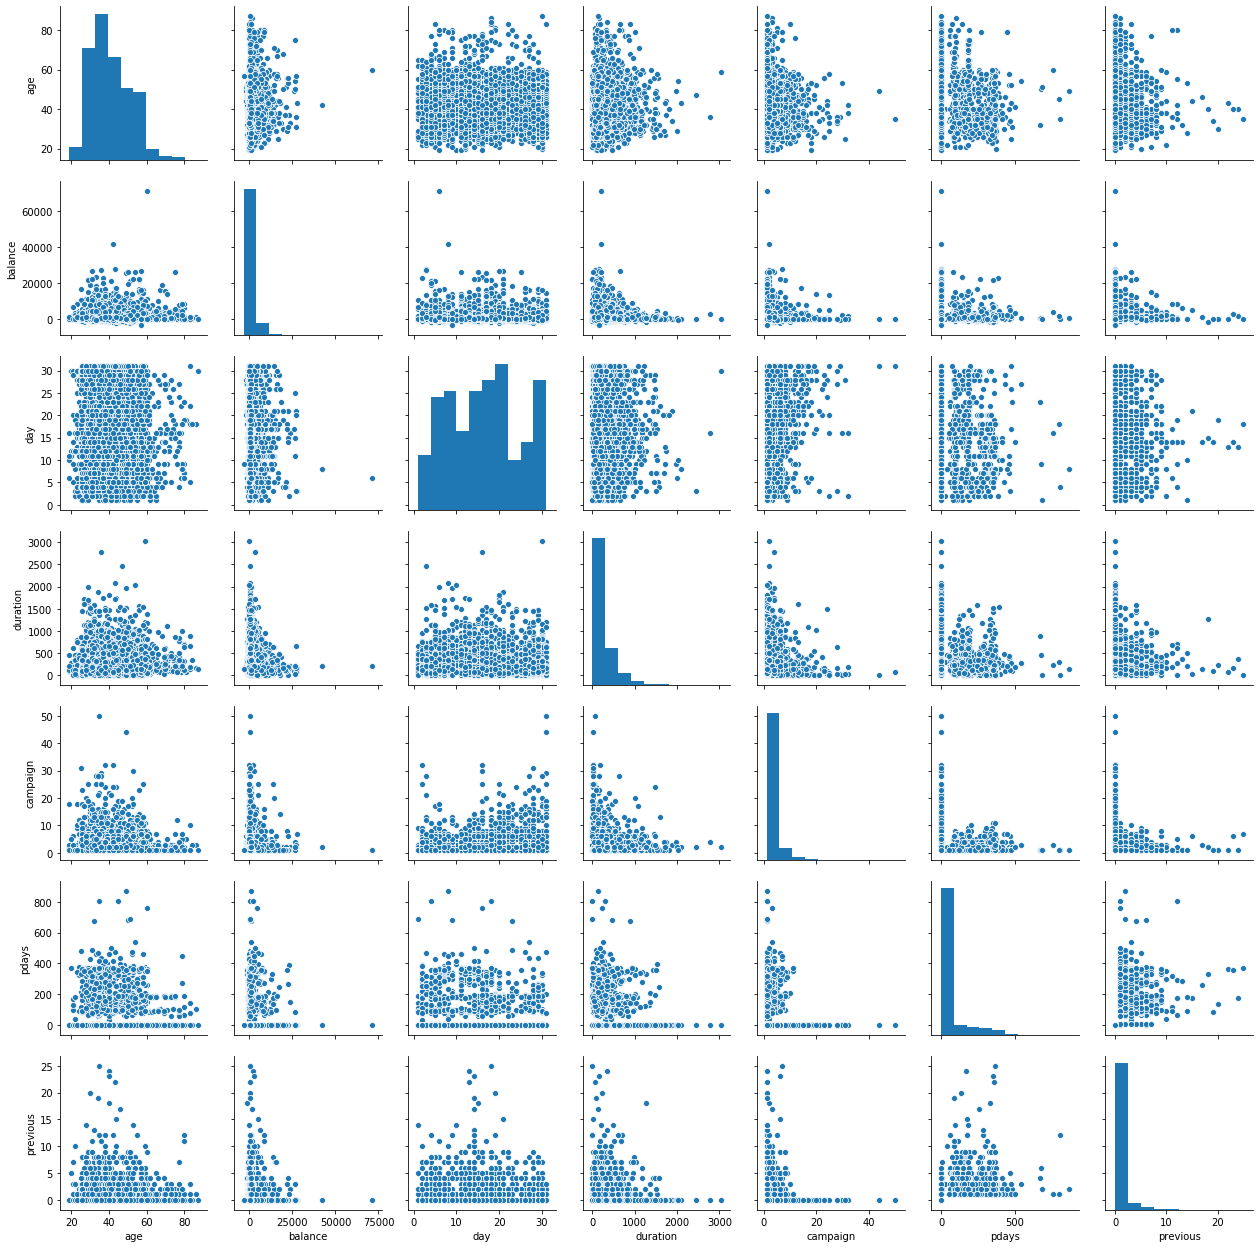

In [0]:
sns.pairplot(df_num)

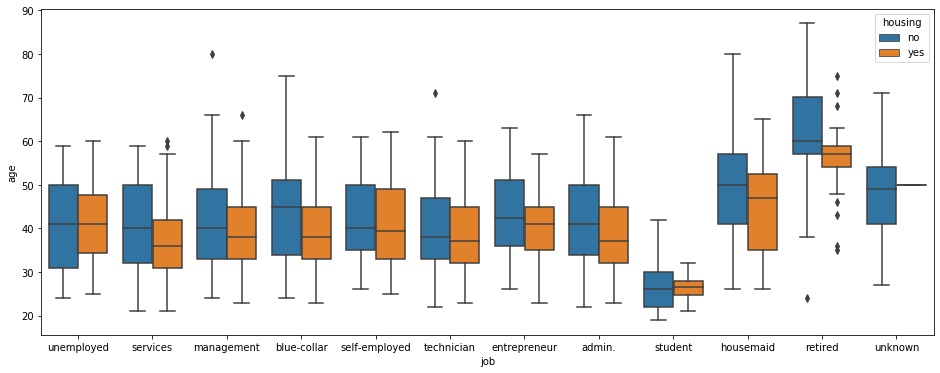

In [0]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="job", y="age", data=df, hue='housing')

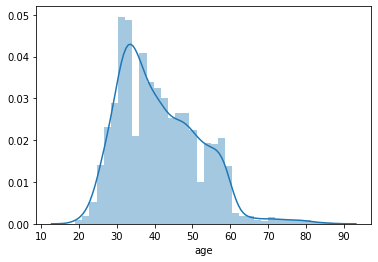

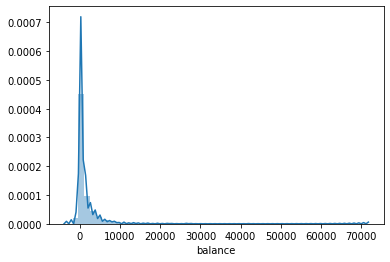

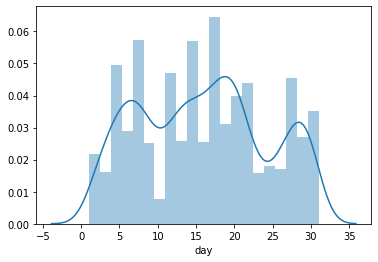

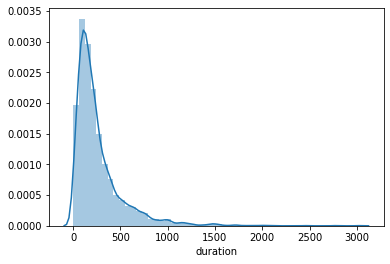

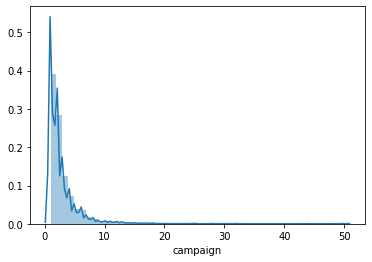

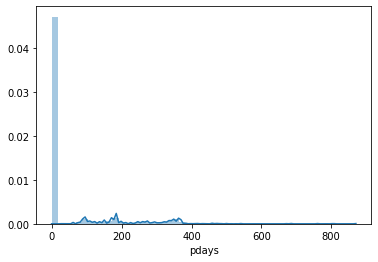

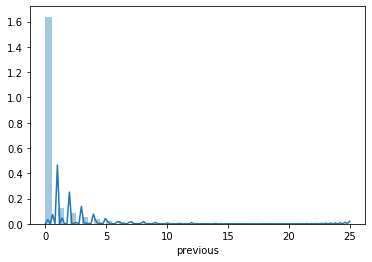

In [0]:
for i, col in enumerate(df_num.columns):
    plt.figure(i)
    sns.distplot(df_num[col])

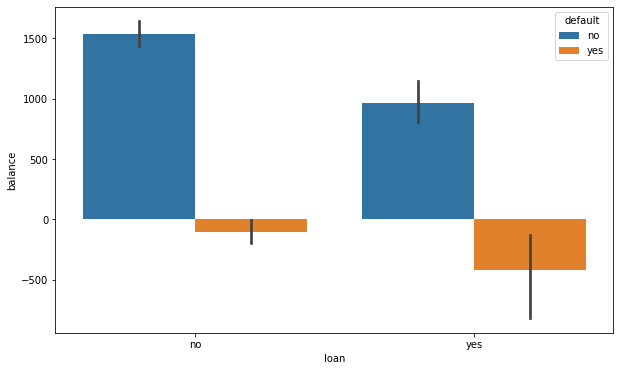

In [0]:
plt.figure(figsize=(10, 6))
sns.barplot(x="loan", y="balance", data=df, hue='default')

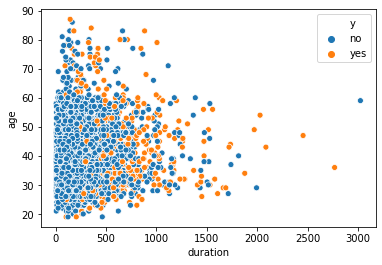

In [0]:
sns.scatterplot(x="duration", y="age", data=df, hue='y')

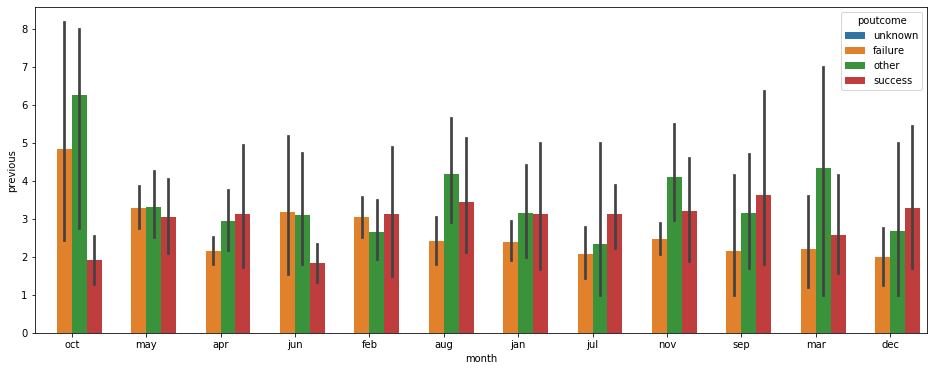

In [0]:
plt.figure(figsize=(16, 6))
sns.barplot(x="month", y="previous", data=df, hue='poutcome')

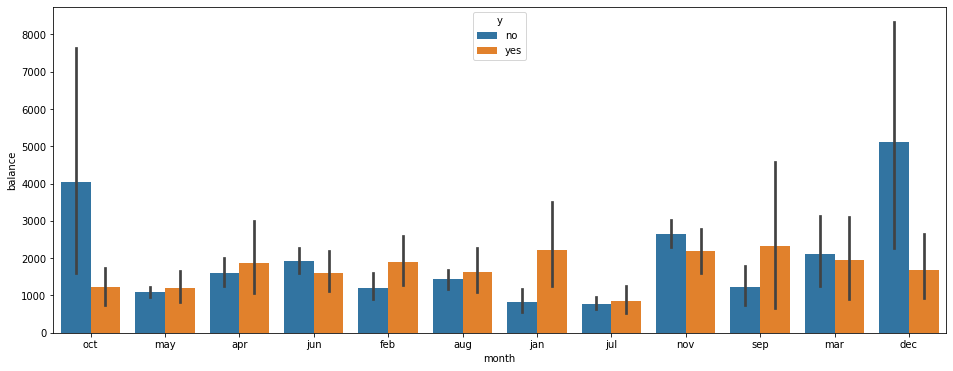

In [0]:
plt.figure(figsize=(16, 6))
sns.barplot(x="month", y="balance", data=df, hue='y')

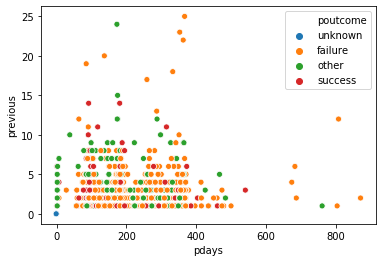

In [0]:
sns.scatterplot(x="pdays", y="previous", data=df, hue='poutcome')

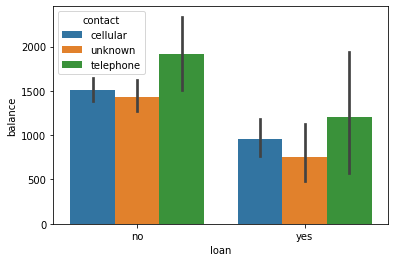

In [0]:
sns.barplot(x="loan", y="balance", data=df, hue='contact')

#Preparing the Data

### One hot encoding for categorical variables

In [0]:
cat_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

In [0]:
df1 = pd.get_dummies(df, prefix_sep="__",columns=cat_columns)
df1.head()

,age,balance,day,duration,campaign,pdays,previous,y,job__admin.,job__blue-collar,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,job__unknown,marital__divorced,marital__married,marital__single,education__primary,education__secondary,education__tertiary,education__unknown,default__no,default__yes,housing__no,housing__yes,loan__no,loan__yes,contact__cellular,contact__telephone,contact__unknown,month__apr,month__aug,month__dec,month__feb,month__jan,month__jul,month__jun,month__mar,month__may,month__nov,month__oct,month__sep,poutcome__failure,poutcome__other,poutcome__success,poutcome__unknown
0,30,1787,19,79,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Apply Test Train Split

In [0]:
#Slice Data
X = df1.loc[:, df1.columns != 'y']
y = df1['y']
print("X.shape=",X.shape)
print("y.shape=",y.shape)

X.shape= (4521, 51)
y.shape= (4521,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

## Trying different classification models

##Decision Trees

In [0]:
clf = DecisionTreeClassifier(max_depth = 3, min_samples_split=50, random_state=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred)

0.9137803979366249

##Naive Bayes

In [0]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model = model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred1)

0.8400884303610906

##KNN

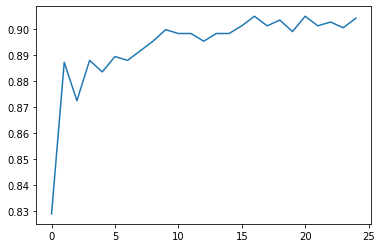

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(scores)

In [0]:
knn = KNeighborsClassifier(n_neighbors=17)
knn = knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred2)

0.9049373618275608

##Logistic Regression

In [0]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(X_train, y_train)

# store the predicted response values
y_pred3 = logreg.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred3)

0.9064112011790715

##SVM

In [0]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_pred4 = svm.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred4)

0.8953574060427414

##Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16, n_jobs=-1)
rf = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [0]:
accuracy_score(y_pred_rf, y_test)

0.9019896831245394

##Ada Boost

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=0.5)
ada_reg.fit(X_train, y_train)
y_pred_ada=ada_reg.predict(X_test)

In [0]:
accuracy_score(y_pred_ada, y_test)

0.9012527634487841

##XGBoost

In [0]:
from xgboost import XGBClassifier
xgb_reg = XGBClassifier()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

In [0]:
accuracy_score(y_pred_xgb, y_test)

0.9167280766396463

##### After performing several different classification models to try to predict if the client will subscribe to the term deposit, all models gave similar accuracy around 88 to 90%. Decision trees and XGBoost gave the highest accuracy of over .91. 

#Feature Engineering

##Try standardizing variables 

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

##Decision Trees

In [0]:
clf_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier()),
    ])

clf_scaled = clf_scaled.fit(X_train, y_train)

y_pred5 = clf_scaled.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred5)

0.868828297715549

##Naive Bayes

In [0]:
#Create a Gaussian Classifier
model_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("bayes", GaussianNB()),
    ])

# Train the model using the training sets
model_scaled = model_scaled.fit(X_train, y_train)
y_pred6 = model_scaled.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred6)

0.8319823139277819

##KNN

In [0]:
knn_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("KNN", KNeighborsClassifier(n_neighbors=17)),
    ])

knn_scaled = knn_scaled.fit(X_train, y_train) 
y_pred7 = knn_scaled.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred7)

0.8983050847457628

##Logistic Regression

In [0]:
logreg_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("LogReg", LogisticRegression(solver='lbfgs')),
    ])

# fit the model with data
logreg_scaled.fit(X_train, y_train)

# store the predicted response values
y_pred8 = logreg_scaled.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred8)

0.9078850405305822

##SVM

In [0]:
svm_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC()),
    ])

svm_scaled.fit(X_train, y_train)

y_pred9 = svm_scaled.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred9)

0.9071481208548269

#### After applying standard scaler to the features and refitting the models, none of the models seemed to have better accuracy. SVM was the only one to increase accuracy, and it went up less than 1%

#Fine tuning the model

#Try dropping variables that seemed to have low correlation to target y

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# using mutual_info_classif to try to capture any kind of statistical dependency
np.random.seed(1)
xbest=SelectKBest(mutual_info_classif, k="all").fit(X_train, y_train)

# building a dataframe to analyze
scores=pd.DataFrame(xbest.scores_)
columns=pd.DataFrame(X_train.columns)
colscores=pd.concat([columns, scores], axis=1)
colscores.columns = ['col','score']
print(colscores.sort_values(by='score', axis=0, ascending=False))

                     col     score
3               duration  0.073074
6               previous  0.022778
5                  pdays  0.020171
49     poutcome__success  0.018364
50     poutcome__unknown  0.014025
34      contact__unknown  0.012704
46            month__sep  0.011569
30              loan__no  0.008357
37            month__dec  0.008078
40            month__jul  0.008056
1                balance  0.007612
0                    age  0.007146
23  education__secondary  0.006999
32     contact__cellular  0.006984
8       job__blue-collar  0.006427
21       marital__single  0.006296
31             loan__yes  0.005355
4               campaign  0.004300
16       job__technician  0.004253
45            month__oct  0.004147
2                    day  0.004067
41            month__jun  0.003754
10        job__housemaid  0.003434
17       job__unemployed  0.003060
36            month__aug  0.002955
35            month__apr  0.002214
19     marital__divorced  0.002028
7            job__ad

In [0]:
df2 = df.drop(['marital','education'], axis=1)

In [0]:
cat_columns1 = ["job", "default", "housing", "loan", "contact", "month", "poutcome"]

In [0]:
df3 = pd.get_dummies(df2, prefix_sep="__",columns=cat_columns1)


In [0]:
#Slice Data
X1 = df3.loc[:, df3.columns != 'y']
y1 = df3['y']
print("X.shape=",X1.shape)
print("y.shape=",y1.shape)

X.shape= (4521, 44)
y.shape= (4521,)


In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 100)

##Decision Trees

In [0]:
clf = DecisionTreeClassifier(max_depth = 3, min_samples_split=50, random_state=100)
clf = clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

In [0]:
accuracy_score(y_test1, y_pred)

0.9071481208548269

##XGBoost

In [0]:
from xgboost import XGBClassifier
xgb_reg = XGBClassifier()
xgb_reg.fit(X_train1, y_train1)
y_pred_xgb = xgb_reg.predict(X_test1)

In [0]:
accuracy_score(y_pred_xgb, y_test1)

0.9152542372881356

###The two best performing models before (Decision Tree and XGB) now have less accuracy with the dropped variables

##Try a Voting Classifier

In [0]:
tree_clf = DecisionTreeClassifier()
bayes_clf = GaussianNB()
knn_clf = KNeighborsClassifier()
log_clf = LogisticRegression(solver = 'lbfgs')
svm_clf = SVC()

rnd_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
xgb_clf = XGBClassifier()

In [0]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
        estimators=[('tree', tree_clf), ('bayes', bayes_clf), ('knn', knn_clf),('lr', log_clf), ('svm', svm_clf),
                    ('rf', rnd_clf),('ada', ada_clf), ('xgb', xgb_clf) ],
        voting='hard')
voting_clf = voting_clf.fit(X_train, y_train)

In [0]:
for clf in (tree_clf, bayes_clf, knn_clf, log_clf, svm_clf, rnd_clf, ada_clf, xgb_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.8806190125276345
GaussianNB 0.8400884303610906
KNeighborsClassifier 0.8835666912306559
LogisticRegression 0.9064112011790715
SVC 0.8953574060427414
RandomForestClassifier 0.9056742815033162
AdaBoostClassifier 0.9115696389093588
XGBClassifier 0.9167280766396463
VotingClassifier 0.9100957995578481


After comparing all of the classifiers, xgboost seems to give the highest accuracy of .917, while random forest and Ada boost perform the second best. The voting classifier seems to slightly underperform compared to Xgboost with an accuracy of .91.

### Trying Neural Network

In [0]:
#from __future__ import absolute_import, division, print_function, unicode_literals

#try:
 #  %tensorflow_version only exists in Colab.
  # %tensorflow_version 2.x
#except Exception:
 # pass
#import tensorflow as tf

#from tensorflow.keras import datasets, layers, models
#import matplotlib.pyplot as plt

In [0]:
y_train3 = LabelEncoder().fit_transform(y_train)
y_test3 = LabelEncoder().fit_transform(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(64, input_dim=51, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer= "rmsprop", loss= "binary_crossentropy", metrics= ["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(X_train, y_train3,
          epochs=50,
          batch_size=100)
score = model.evaluate(X_test, y_test3, batch_size=100)




Epoch 1/50





3164/3164 [==============================] - 5s 2ms/step - loss: 2.4878 - acc: 0.8281
Epoch 2/50
3164/3164 [==============================] - 0s 55us/step - loss: 2.0859 - acc: 0.8644
Epoch 3/50
3164/3164 [==============================] - 0s 47us/step - loss: 1.9753 - acc: 0.8752
Epoch 4/50
3164/3164 [==============================] - 0s 44us/step - loss: 1.9463 - acc: 0.8783
Epoch 5/50
3164/3164 [==============================] - 0s 44us/step - loss: 1.9511 - acc: 0.8780
Epoch 6/50
3164/3164 [==============================] - 0s 44us/step - loss: 1.9408 - acc: 0.8796
Epoch 7/50
3164/3164 [==============================] - 0s 45us/step - loss: 1.9279 - acc: 0.8802
Epoch 8/50
3164/3164 [==============================] - 0s 45us/step - loss: 1.9333 - acc: 0.8799
Epoch 9/50
3164/3164 [==============================] - 0s 49us/step - loss: 1.9388 - acc: 0.8790
Epoch 10/50
3164/3164 [==============================] - 0s 49us/step - loss: 1.9408 - acc: 0.8796
Epoch 11/50


#Improve the Model / Grid Search

In [0]:
prf=[{'n_estimators':[10, 50, 100, 500],'max_depth':[3,6,9],'criterion':['gini','entropy']}]

gs=GridSearchCV(estimator=rf, param_grid=prf, scoring='accuracy',cv=5,n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)

MODEL=gs.best_estimator_.fit(X_train, y_train)
preds=MODEL.predict(X_test)
print(accuracy_score(y_test, preds))

0.8865360303413401
0.9027266028002948


In [0]:
gs1=GridSearchCV(estimator=xgb_clf, param_grid=prf, scoring='accuracy',cv=5,n_jobs=-1)
gs1.fit(X_train, y_train)
print(gs1.best_score_)

MODEL1=gs1.best_estimator_.fit(X_train, y_train)
preds1=MODEL1.predict(X_test)
print(accuracy_score(y_test, preds1))

0.8966498103666245
0.9123065585851142


In [0]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train3)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test3,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test3,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test3,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test3,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test3,y_pred_acc)

Accuracy Score : 0.9086219602063376
Precision Score : 0.625
Recall Score : 0.31690140845070425
F1 Score : 0.42056074766355145


array([[1188,   27],
       [  97,   45]])

###Grid earch seems to slightly improve the accuracy of Random Forest, Logistic Regression and XGBoost